  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

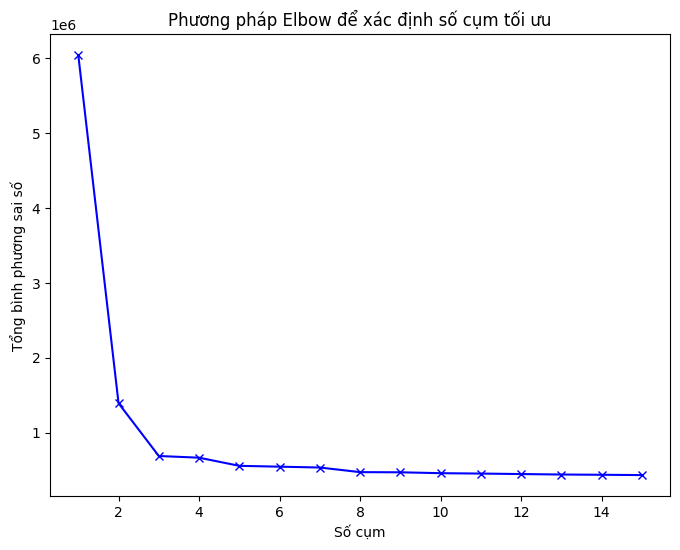


Cụm 0:
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P11', 'P12', 'P13', 'P14', 'P20', 'P21', 'P22', 'P23', 'P26', 'P29', 'P31', 'P32', 'P33', 'P50', 'P53', 'P59', 'P62', 'P65', 'P68', 'P71', 'P74', 'P77', 'P81', 'P82', 'P91', 'P93', 'P94', 'P95', 'P98', 'P99', 'P100', 'P103', 'P104', 'P105', 'P106', 'P108', 'P109', 'P110', 'P111', 'P114', 'P115', 'P116', 'P117', 'P118', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P144', 'P145', 'P146', 'P147', 'P148', 'P149', 'P150', 'P151', 'P152', 'P153', 'P154', 'P155', 'P156', 'P157', 'P158', 'P159', 'P160', 'P161', 'P162', 'P163', 'P164', 'P165', 'P166', 'P171', 'P195', 'P197', 'P198', 'P199', 'P200', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'P207', 'P209', 'P210', 'P211', 'P212', 'P213', 'P214', 'P215', 'P216', 'P217', 'P218', 'P219', 'P220', 'P221', 'P222', 'P223', 'P224', 'P225', 'P226', 'P227', 'P228', 'P229', 'P230', 'P231', 'P232', 'P233', 'P234', 'P235', 'P236', 'P237', 'P238', 'P239', 'P240', 'P241', 'P242',

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Bước 1: Đọc dữ liệu
data_file = "D:\\Python\\MachineLearning\\MachineLearning\\week09\\data\\Sales_Transactions_Dataset_Weekly.csv"
data = pd.read_csv(data_file)

# Bước 2: Kiểm tra dữ liệu
print(data.head())  # Hiển thị vài dòng đầu
print(data.info())  # Thông tin về dữ liệu

# Bước 3: Chuẩn bị dữ liệu cho phân cụm
# Ở đây ta chọn dữ liệu gốc từ week 0 đến week 51
features = data.loc[:, "W0":"W51"].values  # Chỉ lấy dữ liệu tuần

# Bước 4: Xác định số cụm tối ưu bằng phương pháp Elbow
def find_optimal_clusters(data, max_clusters=15):
    sse = []  # Sum of squared errors
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)  # Total within-cluster sum of squares

    # Vẽ đồ thị Elbow
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse, 'bx-')
    plt.xlabel("Số cụm")
    plt.ylabel("Tổng bình phương sai số")
    plt.title("Phương pháp Elbow để xác định số cụm tối ưu")
    plt.show()

    # Tìm "elbow point"
    diffs = np.diff(sse)
    best_k = np.argmin(diffs) + 2  # Điểm đầu tiên có sự thay đổi đột ngột
    return best_k

# Tìm số cụm tối ưu
optimal_clusters = find_optimal_clusters(features)

# Bước 5: Phân cụm bằng K-means với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Bước 6: Thêm cột cluster vào dữ liệu
data["Cluster"] = clusters

# Bước 7: Kiểm tra các mã sản phẩm trong mỗi cụm
for i in range(optimal_clusters):
    print(f"\nCụm {i}:")
    print(data[data["Cluster"] == i]["Product_Code"].tolist())
